## CIFAR10 Dataset 생성

In [3]:
import numpy as np
import pandas as pd
import os

In [14]:
from tensorflow.keras.datasets import cifar10

In [5]:
pip install tensorflow

     ------------------------------------ 455.9/455.9 MB 486.1 kB/s eta 0:00:00
  Using cached flatbuffers-22.9.24-py2.py3-none-any.whl (26 kB)
  Using cached termcolor-2.0.1-py3-none-any.whl (5.4 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
     ------------------------------------ 896.6/896.6 kB 177.8 kB/s eta 0:00:00
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
     ---------------------------------------- 1.5/1.5 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 525.2 kB/s eta 0:00:00
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     ---------------------------------------- 2.6/2.6 MB 554.8 kB/s eta 0:00:00
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-no

In [15]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

170498071/170498071 [==============================] - 218s 1us/step
train dataset shape: (50000, 32, 32, 3) (50000, 1)
test dataset shape: (10000, 32, 32, 3) (10000, 1)


In [16]:
train_images[0, :, :, :], train_labels[0, :]

(array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
  

In [17]:
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(train_labels[:10])

#기본이 되는 딕셔너리임 이걸 매핑해서 이제 쓰는 거. 순서가 아니라 그냥 목록일 뿐.. 뽑아내는 건 인덱스. 트레인 데이터는 순서대로 들어가
# 있는게 아님
#트레인 이미지는 순서대로 데이터가 들어가있음. 오른쪽 숫자값을 타이틀에 6 이런 숫자로 나타내긴 뭐하니까 이미 선언되어 있는 카테고리컬한
# 걸 영어로 적어놓은 값, 숫자 6을 뽑아내면 얘를 숫자에 매핑되는 names로 뽑아냄

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


### 1 CIFAR10데이터 시각화

In [89]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

ModuleNotFoundError: No module named 'cv2'

In [91]:
# pip install cv2

6.0
6.0 6.0
9.0
9.0 9.0
9.0
9.0 9.0
4.0
4.0 4.0
1.0
1.0 1.0
1.0
1.0 1.0
2.0
2.0 2.0
7.0
7.0 7.0
8.0
8.0 8.0
3.0
3.0 3.0
4.0
4.0 4.0
7.0
7.0 7.0
7.0
7.0 7.0
2.0
2.0 2.0
9.0
9.0 9.0
9.0
9.0 9.0


'\n\n'

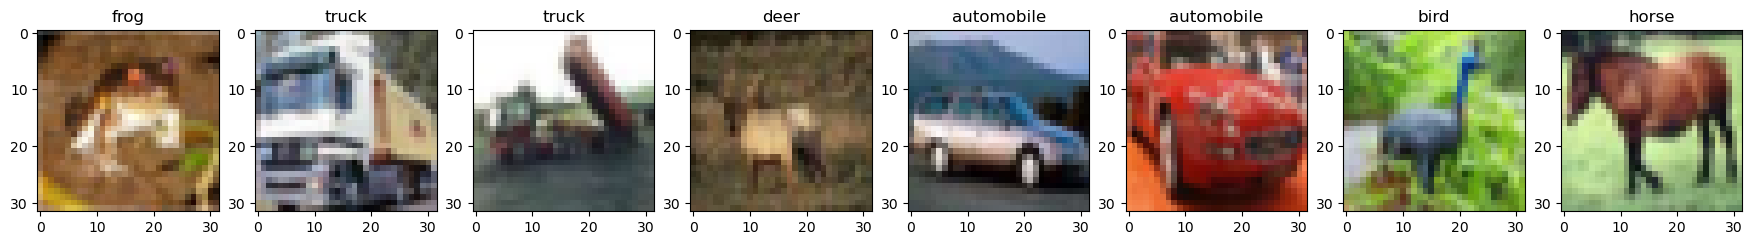

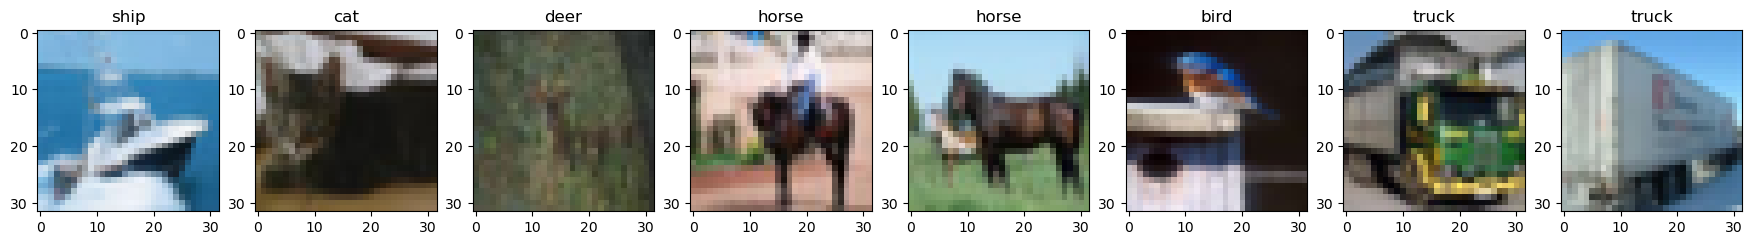

In [92]:
def show_images(images, labels, ncols=8): #이미지스는 8개
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
#     서브플롯의 리턴값이 피규어. axs는 행은 1, 열은 8개(위에 적여있는 수) , 8번을 돌려서 데이터값을 1*8에 넣겠다.
    for i in range(ncols):
        axs[i].imshow(images[i])
        #아이엠쇼는 이미지를 보여주는 함수. i는 0이니 첫 번째 이미지를 axs[0]번째 공간에 
        print(labels[i])
        label = labels[i].squeeze()
#         labels[i]는 [3]이야 스퀴즈쓰면 밖가로가 사라지며 3이 담기게 됨
        print(labels[i], label)
        axs[i].set_title(NAMES[int(label)]) #위에 이름들(비행기 등등)을 타이틀로 붙어주겠다.
        
show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

'''

'''

### 2 Data preprocessing

In [93]:
def get_preprocessed_data(images, labels):
    
    #학습과 테스트 이미지 array를 0~1 tkdlrkqtdmfh scale 및 float32 형 변형
    #compile함수에서 loss = categorical_crossentropy일 경우 fit 시점의 label값을 ome-hot encoding된 값으로 입력
    #compile 함수에서 loss=sparse+categorical_crossentropy일 경우 fit 시점의 label값을 label encoding된 값으로 입력
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [94]:
print(train_images.shape, train_labels.shape)

(50000, 32, 32, 3) (50000,)


In [95]:
train_images[0, :, :, :]
# 숫자를 랜더링해주는 함수가 아임쇼 실제로는 숫자로된 픽셀값! 우리가 보기 편하게 보여주는 게 아임쇼

array([[[0.00090734, 0.00095348, 0.00096886],
        [0.00066128, 0.00070742, 0.00069204],
        [0.00076894, 0.00073818, 0.00066128],
        ...,
        [0.00242983, 0.00202999, 0.0016609 ],
        [0.00233756, 0.00192234, 0.00156863],
        [0.00227605, 0.00190696, 0.00158401]],

       [[0.00024606, 0.00030757, 0.00030757],
        [0.        , 0.        , 0.        ],
        [0.00027682, 0.00012303, 0.        ],
        ...,
        [0.00189158, 0.00135333, 0.00084583],
        [0.00183007, 0.00127643, 0.00076894],
        [0.0018762 , 0.00133795, 0.00087659]],

       [[0.00038447, 0.00036909, 0.00032295],
        [0.00024606, 0.00010765, 0.        ],
        [0.00075356, 0.00041522, 0.00012303],
        ...,
        [0.00181469, 0.00129181, 0.00076894],
        [0.00184544, 0.00129181, 0.00076894],
        [0.00167628, 0.00112265, 0.00064591]],

       ...,

       [[0.00319877, 0.00261438, 0.00147636],
        [0.00309112, 0.00235294, 0.00052288],
        [0.00304498, 0

In [96]:
train_labels

array([6., 9., 9., ..., 9., 1., 1.], dtype=float32)

In [97]:
test_labels

array([3., 8., 8., ..., 5., 1., 7.], dtype=float32)

In [98]:
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()

In [99]:
train_labels

array([6., 9., 9., ..., 9., 1., 1.], dtype=float32)

In [100]:
test_labels

array([3., 8., 8., ..., 5., 1., 7.], dtype=float32)

### 3 Custom Model 생성

<img src="./b.jpg">

In [101]:
#뭐 적용 후에는 필터개수 증가시킬거고 사이즈 작아지고 채널의 깊이는 늘어나는 형태로 생성할 것.
#맨 마지막 유닛 개수는 10개. 이런 것들이 정리가 되어야 함 .?

In [102]:
IMAGE_SIZE = 32

In [103]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D,\
            GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint, \
            LearningRateScheduler

In [104]:
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)) #3은 컬러니까 3채널.
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(input_tensor) 
# 커널에 대한 커널사이즈 3,3 필터가 32개 있다는 뜻, 하나만 있는게 아니라 여러 층을 쌓아서 테스트한다는 뜻,
# 원사이즈에 맞게 패딩처리를 해주는데 옵션을 same으로 해주면 알아서 패딩처리해서 원본이미지랑 똑같은 아웃풋을 내더라.
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x) #x값을 다시 리턴해준다~ 앞전의 x다시 데리고 옴

In [105]:
#풀링을 한 번 해주겠다 : 합성 곱에 의해 얻어진 피쳐맵X의 값을 샘플링해주고 정보를 압축하는 과정을 풀링이라고 함.
x = MaxPooling2D(pool_size=(2, 2))(x)  #2*2로 맥스풀링 이 과정을 3번 반복 1번
#X값의 피쳐맵에 일정영역별로 하나의 값을 (2*2니까) 추출. 피쳐맵의 사이즈를 줄인다! 맥스풀링은 최대값을 뽑아내서 엣지값이 강하게 나옴.

In [106]:
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x) 
#피쳐맵 사이즈는 줄어들고 깊이는 깊어야 피쳐의 추상화가 잘 이뤄짐
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x) #2번
x = Activation('relu')(x) #렐루는 일케 써도 되고 =으로 써도 됨 방법의 차이
x = MaxPooling2D(pool_size=2)(x)

In [107]:
x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x) #3번
x = MaxPooling2D(pool_size=2)(x)

In [108]:
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x) #50프로 비율로 끊겠다. 너무 많으니까. 렉걸리니까
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x) #30%를 드롭아웃(제거)하겠다
#이진분류니까 softmax

In [109]:
output = Dense(10, activation='softmax', name='output')(x)
model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 64)        36928     
                                                           

In [113]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [114]:
#Model 학습 수행및 테스트 데이터로 평가

In [117]:
# #벨리데이션 슬릿: 벨리데이션 데이터로 별도의 검증용 데이터세트를 설정하지 않고 자동으로 학습용 데이터에서 검증용 데이터 
history = model.fit(x=train_images, y=train_labels, batch_size=64, epochs=30, validation_split=0.15)
# y=train_labels 얘가 레이블 인코더에 들어간다 
# 학습시점에 테스트 데이터를 벨리데이션이라고 함
######!!!!!다음에 절대 실행하지마 5시간 걸려!!!!!!!

Epoch 1/30
665/665 [==============================] - 83s 125ms/step - loss: 2.3027 - accuracy: 0.0962 - val_loss: 2.3027 - val_accuracy: 0.0972
Epoch 2/30
665/665 [==============================] - 98s 147ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.0999
Epoch 3/30
665/665 [==============================] - 110s 166ms/step - loss: 2.3027 - accuracy: 0.0964 - val_loss: 2.3028 - val_accuracy: 0.0953
Epoch 4/30
665/665 [==============================] - 124s 187ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3029 - val_accuracy: 0.0953
Epoch 5/30
665/665 [==============================] - 136s 205ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.0999
Epoch 6/30
665/665 [==============================] - 151s 227ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.0975
Epoch 7/30
665/665 [==============================] - 150s 226ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3028 - v

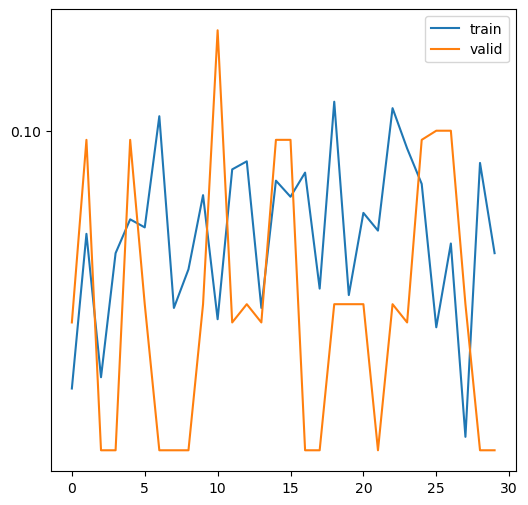

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

In [84]:
model.evaluate(test_images, test_labels) #이벨루에이트는 4차원이라 상관없음 얘는 개수까지 들어간 4차원.

313/313 [==============================] - 10s 33ms/step - loss: 1.4047 - accuracy: 0.4781


[1.4047255516052246, 0.4781000018119812]

## 이미지 분류 예측

In [ ]:
preds = model.predict(test_images[0]) #얘는 3차원, 여기 파라미터는 4차원으로 들어가야 하는데 3차원이라 오류

In [86]:
preds = model.predict(np.expand_dims(test_images[0], axis=0)) #그래서 (np.expand_dims(test_images[0], axis=0))의 4차원으로 바꿔줌

1/1 [==============================] - 0s 186ms/step


In [87]:
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)
preds.argmax()

#결과가 너무 느리면 gpu설정해서 코랩해서 해도 됨
#10가지 . 얘네들의 총합은 1 왜 ? 소프트맥스라

예측 결과 shape: (1, 10)
예측 결과: [[0.01451089 0.00339845 0.02955776 0.45371094 0.00545399 0.4154195
  0.02608133 0.03413066 0.00940815 0.0083283 ]]


3

In [120]:
preds = model.predict(test_images[:32], batch_size=32) #이미지 장수가 들어있기 떄문에 익스팬드 딤스 안 해도 됨
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)
#결과가 32개로 나옴 32개 뽑음. 32개에 대한 이미지 / 이미지 한 장당 결과가 10개 / 32개의 10개의 추측성 이미지가 나옴

1/1 [==============================] - 0s 166ms/step
예측 결과 shape: (32, 10)
예측 결과: [[0.1000787  0.09965526 0.10098223 0.10050784 0.10040361 0.09828548
  0.099705   0.10004582 0.10078286 0.09955323]
 [0.1000787  0.09965526 0.10098223 0.10050784 0.10040361 0.09828548
  0.099705   0.10004582 0.10078286 0.09955323]
 [0.1000787  0.09965526 0.10098223 0.10050784 0.10040361 0.09828548
  0.099705   0.10004582 0.10078286 0.09955323]
 [0.1000787  0.09965526 0.10098223 0.10050784 0.10040361 0.09828548
  0.099705   0.10004582 0.10078286 0.09955323]
 [0.1000787  0.09965526 0.10098223 0.10050784 0.10040361 0.09828548
  0.099705   0.10004582 0.10078286 0.09955323]
 [0.1000787  0.09965526 0.10098223 0.10050784 0.10040361 0.09828548
  0.099705   0.10004582 0.10078286 0.09955323]
 [0.1000787  0.09965526 0.10098223 0.10050784 0.10040361 0.09828548
  0.099705   0.10004582 0.10078286 0.09955323]
 [0.1000787  0.09965526 0.10098223 0.10050784 0.10040361 0.09828548
  0.099705   0.10004582 0.10078286 0.09955323

In [121]:
#각 리스트 중 확률이 제일 높은 확률이 나옴(index가 추출됨)
predicted_class = np.argmax(preds, axis=1)
print('예측 클래스 값:', predicted_class)

예측 클래스 값: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


2
2 2
2
2 2
2
2 2
2
2 2
2
2 2
2
2 2
2
2 2
2
2 2
3.0
3.0 3.0
8.0
8.0 8.0
8.0
8.0 8.0
0.0
0.0 0.0
6.0
6.0 6.0
6.0
6.0 6.0
1.0
1.0 1.0
6.0
6.0 6.0


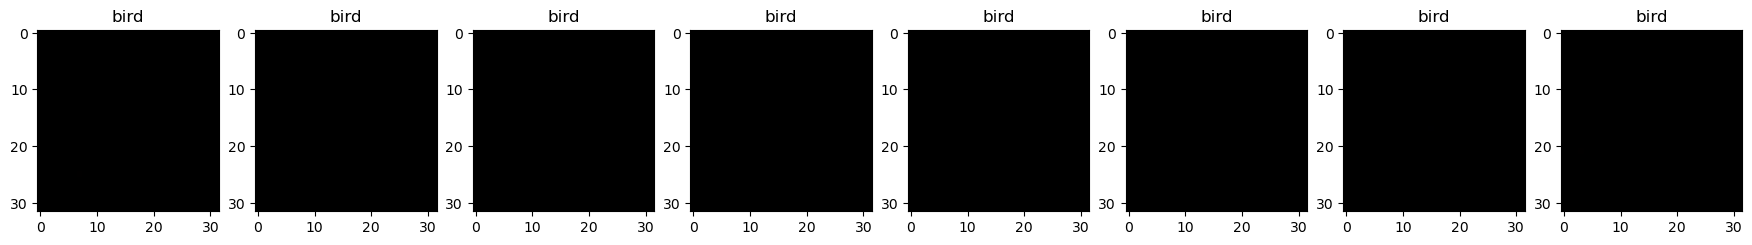

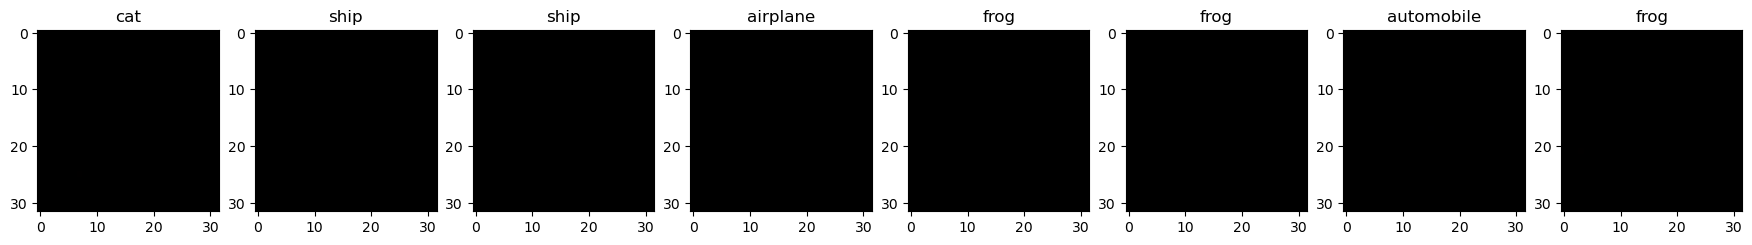

In [122]:
show_images(test_images[:8], predicted_class[:8], ncols=8)
show_images(test_images[:8], test_labels[:8], ncols=8)